# Задание:

* Придумайте и опишите наибольшее число вариантов использования этих данных. Для решения каких практических задач их можно применить?
* Выберите одну из описанных вами задач и реализуйте ее решение на Python / R при помощи оптимальной на ваш взгляд модели. Опишите, почему вы выбрали именно эту модель.
* Опишите ваш подход к предварительному анализу (в т.ч. визуализации) и обработке данных, работе с признаками, кросс валидацией, настройкой модели и ее оценкой. Объясните выбор того или иного решения и, по возможности, сравните с альтернативами.
* Опишите, как бы вы улучшили модель из пункта 2, если бы у вас было больше времени и существенно больший датасет.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import *
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.metrics import *
import seaborn as sns
from scipy.stats import *
from tqdm import tqdm_notebook
import itertools

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
cathegorical = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',\
               'engine-type', 'num-of-cylinders', 'fuel-system']

numerical = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', \
            'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', \
           'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', \
           'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', \
           'city-mpg', 'highway-mpg', 'price']

In [3]:
df = pd.read_csv('dataset.csv', names=columns)

In [4]:
df.shape

(205, 26)

In [5]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


**Attribute Information**:

1. *symboling*: -3, -2, -1, 0, 1, 2, 3. 
2. *normalized-losses*: continuous from 65 to 256. 
3. *make*: 
alfa-romero, audi, bmw, chevrolet, dodge, honda, 
isuzu, jaguar, mazda, mercedes-benz, mercury, 
mitsubishi, nissan, peugot, plymouth, porsche, 
renault, saab, subaru, toyota, volkswagen, volvo 

4. *fuel-type*: diesel, gas. 
5. *aspiration*: std, turbo. 
6. *num-of-doors*: four, two. 
7. *body-style*: hardtop, wagon, sedan, hatchback, convertible. 
8. *drive-wheels*: 4wd, fwd, rwd. 
9. *engine-location*: front, rear. 
10. *wheel-base*: continuous from 86.6 120.9. 
11. *length*: continuous from 141.1 to 208.1. 
12. *width*: continuous from 60.3 to 72.3. 
13. *height*: continuous from 47.8 to 59.8. 
14. *curb-weight*: continuous from 1488 to 4066. 
15. *engine-type*: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
16. *num-of-cylinders*: eight, five, four, six, three, twelve, two. 
17. *engine-size*: continuous from 61 to 326. 
18. *fuel-system*: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 
19. *bore*: continuous from 2.54 to 3.94. 
20. *stroke*: continuous from 2.07 to 4.17. 
21. *compression-ratio*: continuous from 7 to 23. 
22. *horsepower*: continuous from 48 to 288. 
23. *peak-rpm*: continuous from 4150 to 6600. 
24. *city-mpg*: continuous from 13 to 49. 
25. *highway-mpg*: continuous from 16 to 54. 
26. *price*: continuous from 5118 to 45400.

Mssing Attribute Values: (denoted by "?")

2). 41 $\qquad$ 6). 2 $\qquad$ 19). 4 $\qquad$ 20). 4 $\qquad$ 22). 2 $\qquad$ 23). 2 $\qquad$ 26). 4

# Примеры задач, которые можно решать, используя текущие данные:

- ### Кластеризация

Решая задачу кластеризации, мы группируем все объекты в несколько классов, притом делаем это без обучения. Вполне может получиться так, что результирующие классы будут содержать в себе модели машин разных марок, разных технических характеристик и пр., но с точки зрения примененного алгоритма эти объекты будут все же более схожи друг с другом, чем с объектами других классов. 

Для начала, я бы попытался понять, является ли распределение указанных объектов хорошо разделимым или представляет собой сгустки плотности, поскольку от этого будет зависеть выбор алгоритма. Можно воспользоваться, например, One-Hot-Encoding для преобразования категориальных признаков в целочисленные, применить на матрице признаков алгоритм t-SNE (можно также и MDS), и получить на выходе изображение рассматриваемых объектов на плоскости с расположением друг относительно друга подобным тому, которое было в исходном многомерном пространстве. В том случае, когда будут видны хорошо разделимые группы объектов, неплохо было бы проверить наличие кластерной стуруктуры, рассчитав статистику Хопкинса и сравнив ее с нулем. 

Если предыдущие шаги указывают на наличие хорошо разделимых кластеров, то непосредственно для кластеризации можно воспользоваться, например, методом K-Means++ (с дальнейшим поиском оптимального количества кластеров методом локтя), ЕМ-алгоритмом, или, скажем, агломеративной кластеризацией (с отсечением в нужном месте иерархии на дендрограммах). Если же объекты выглядят скорее сгустками плотности, то следует применить density-based алгоритмы (DBSCAN, OPTICS).

Для контроля качества кластеризации можно оценить ряд метрик. Посчитать среднее внутрикластерное и межкластерное расстояния $F_0$ и $F_1$, проверив $F_0 / F_1 \rightarrow \min$. Можно применить силуэтный анализ, построить коэффициент силуэта для каждого объекта и по значениям этого коэффициента для объектов внутри кластера понять качество кластеризации.

С точки зрения практической пользы, кластеризация позволит понять, какие из объектов содержат в себе больше схожих черт, а какие меньше, несмотря на те представления, которые могли присутствовать об этих объектах до этого. Конкретно в этом случае, например, может получиться так, что какая-то конкретная машина конкретной марки по всем своим параметрам больше подходит к машинам другой марки. Если спрос на эту машину велик, то имеет смысл задуматься над тем, в чем преимущества этой машины над остальными из своего класса с точки зрения технических характеристик. И так далее.

- ### Классификация

Задача классификации заключается в том, что сначала мы даем алгоритму обучиться на тренировочной выборке на предмет того, какой объект необходимо относить к какому классу, а затем на тестовой выборке проверяем, как он усвоил это правило. В данном случае целевой меткой может быть любой категориальный признак из таблицы (make, body-style, engine-location и пр) либо придуманный самостоятельно (например, на основе вещественных признаков - т.е., скажем, разделим признак horsepower на 2 категории: slow, fast). Соответственно, если целевых меток две, то классификация бинарная, если больше, то многоклассовая.

Для решения поставленной задачи классификации могут быть успешно использованы, например, линейный классификатор, классификатор на логистической регрессии, метод опорных векторов, байесовский классификатор, деревья решений и их ансамбли. Как правило, лучше всего работают последние, а именно Random Forest и Gradient Boosting. Для профилактики переобучения может использовать регуляризация разных типов. Кроме того, существует ряд техник для выбора тренировочной и тестовой выборок. Скажем, кросс-валидация - когда все данные (или почти все, за исключением тестовой части) разбиваются на несколько частей (фолдов), каждая из которых по очереди служит валидационной, а остальные - тренировочной.

Анализ качества классификации может производиться с помощью оценки таких метрик, как accuracy, precision, recall, $F_\beta$-мера. Можно построить ROC-кривую и посчитать площадь под ней (AUC-ROC). Feature engineering используемой модели будет производиться под конкретную метрику, которую будет решено оптимизировать, поэтому вопрос правильности ее выбора очень важен.

Настроенный классификатор позволит понять, к какому целевому классу отнести очередную машину с ее определенными техническими характеристиками. К какой марке ее отнести, к какой категории риска, где скорее всего у нее будет располагаться двигатель и т.п. в зависимости от постановки задачи.

- ### Регрессия

Задача регрессии во многом аналогична задаче классификации, только предсказывает она не класс, а вещественное число. Впрочем, разница между ними действительно не так велика. Один и тот же алгоритм может быть настроен и под классификацию, и под регрессию. По аналогии со сказанным выше, целевой меткой может быть, скажем, housepower или price. 

Разницу между предсказаниями целевой метки и ее реальными значениями можно считать по метрикам MSE, RMSE, MAE, LogLoss и т.п.

# Предсказание стоимости автомобиля 

Среди возможных задач выберем следующую: предсказание стоимости автомобиля (т.е. значения в колонке 'price') по остальным имеющимся признакам. Это задача регрессии. Но для начала необходимо произвести некоторую предобработку данных.

### Отсутствующие данные

В условии сказано, что в данных имеются пропуски. Это относится к 7ми признакам, 6 из которых являются численными, а 1 - категориальным (*num-of-doors*).

Рассмотрим для начала численные признаки. 

В признаке *normalized-losses* отсутствует 41 позиция. Проверим:

In [7]:
df['normalized-losses'].value_counts().head()

?      41
161    11
91      8
150     7
104     6
Name: normalized-losses, dtype: int64

Действительно. Это составляет $41/205=20\%$ от данных. 

Есть 3 варианта решения этой проблемы:
* Убрать все объекты, в которых этот признак отсутствует, что означает лишиться $20\%$ выборки.
* Удалить сам признак, однако это лишит нас почти $1/26=4\%$ признаков. 
* Заполнение отсутствующих данных "наиболее вероятными" - например, средними или медианами.

Думаю, в данном случае уместно будет воспользовать 2м или 3м вариантом. В связи с тем, что указанный признак теоретически может оказаться сильно влияющим на модель, удалять мы его все же не будем, а заполним отсутствующие значения в нем медианами. Аналогично поступим с остальными 5ю признаками, где есть пропуски.

In [8]:
features_with_missing_values = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
for feature in features_with_missing_values:
    df[feature] = df[feature].replace('?', np.median(list(map(float, filter(lambda a: a != '?', df[feature].astype(str))))))

Проверим, исчезли ли знаки вопроса в рассмотренных признаках:

In [9]:
for feature in features_with_missing_values:
    print(feature,':', sum(df[feature].astype(str) == '?'))

normalized-losses : 0
bore : 0
stroke : 0
horsepower : 0
peak-rpm : 0
price : 0


Исчезли. 

Рассмотрим категориальный признак *num-of-doors*. У 2х объектов этот признак отсутствует. Думаю, будет грубым нарушением сказать, что у той или иной машины 2 двери или 4, если таковой информацией мы достоверно не располагаем. Сделать этот признак численным и заполнить пропуски средним (3 двери) также было бы странно. Так что просто удалим объекты, у которых этот признак отсутствует.

Таким образом, после проверденных действий операция замены всех ячеек со знаком вопроса на значение NaN и дальнейшее удаление строк таблицы с NaN после проделанных операций должна укоротить длину таблицы на 2 строчки:

In [10]:
df = df.replace('?', np.NaN).dropna().reset_index(drop=True)

In [11]:
df.shape

(203, 26)

Что и получилось в итоге.

### Анализ численных признаков

Посмотрим на корреляции между численными признаками и нашей целевой меткой, построив попутно графики:

In [12]:
def calc_correlations(feature):
    corr_pearson = pearsonr(df[feature].astype(float), df['price'].astype(float))
    corr_spearman = spearmanr(df[feature].astype(float), df['price'].astype(float))
    print('r_pearson =', corr_pearson[0], ' ( p_value =', corr_pearson[1], ')')
    print('r_spearman =', corr_spearman[0], ' ( p_value =', corr_spearman[1], ')')

symboling
r_pearson = -0.0809399928732  ( p_value = 0.250976551941 )
r_spearman = -0.141259710723  ( p_value = 0.0443989787877 )


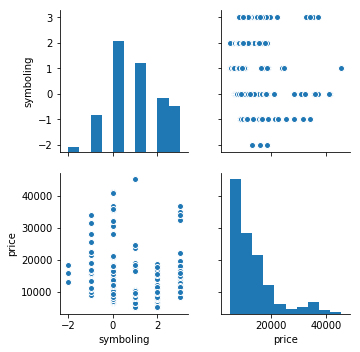

normalized-losses
r_pearson = 0.097997170995  ( p_value = 0.164233599886 )
r_spearman = 0.147422003122  ( p_value = 0.0358211474533 )


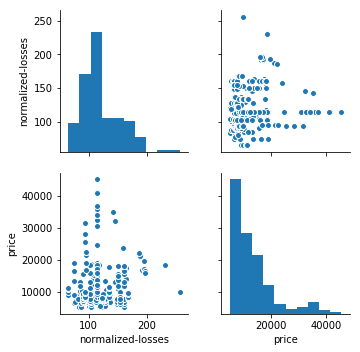

wheel-base
r_pearson = 0.584074773816  ( p_value = 5.85846626477e-20 )
r_spearman = 0.678523020192  ( p_value = 9.76160761424e-29 )


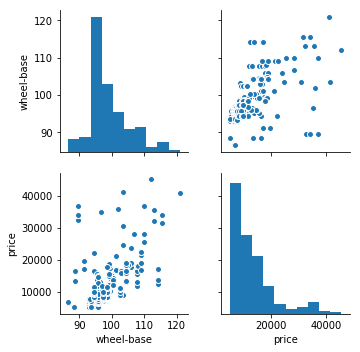

length
r_pearson = 0.68711430822  ( p_value = 1.05851959819e-29 )
r_spearman = 0.800130444854  ( p_value = 1.69252258595e-46 )


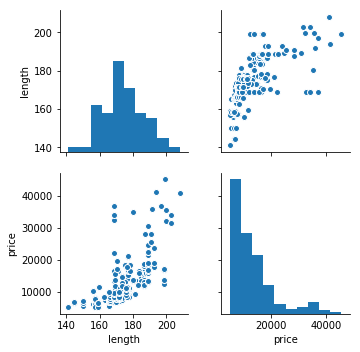

width
r_pearson = 0.72476505911  ( p_value = 2.34023769411e-34 )
r_spearman = 0.795408331396  ( p_value = 1.36653866697e-45 )


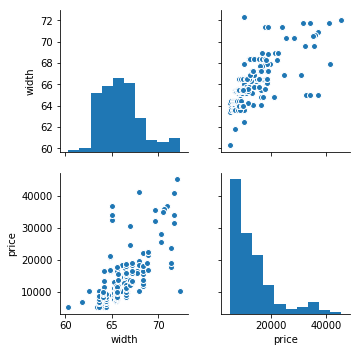

height
r_pearson = 0.138722262938  ( p_value = 0.0484003085798 )
r_spearman = 0.255656047525  ( p_value = 0.000231944812765 )


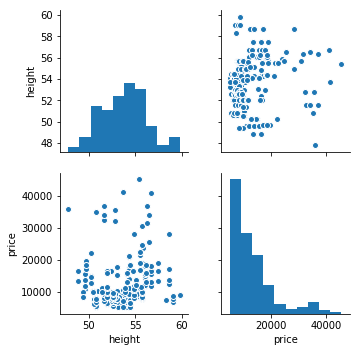

curb-weight
r_pearson = 0.81943618804  ( p_value = 1.77944378533e-50 )
r_spearman = 0.894243752623  ( p_value = 4.19635426371e-72 )


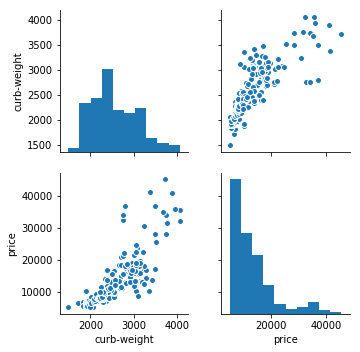

engine-size
r_pearson = 0.860134086927  ( p_value = 1.11616460071e-60 )
r_spearman = 0.811418252042  ( p_value = 9.07931038859e-49 )


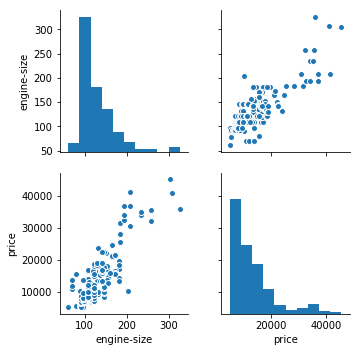

bore
r_pearson = 0.532242578286  ( p_value = 3.02644225914e-16 )
r_spearman = 0.635042199343  ( p_value = 2.564107763e-24 )


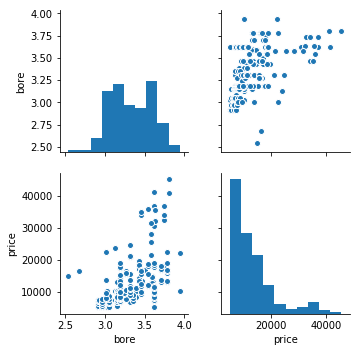

stroke
r_pearson = 0.0856588810388  ( p_value = 0.224309098879 )
r_spearman = 0.111815801581  ( p_value = 0.112223746884 )


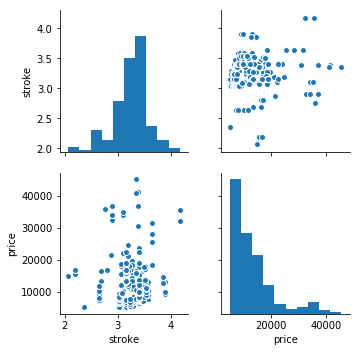

compression-ratio
r_pearson = 0.0778457054486  ( p_value = 0.269611507069 )
r_spearman = -0.17524617473  ( p_value = 0.0123899519617 )


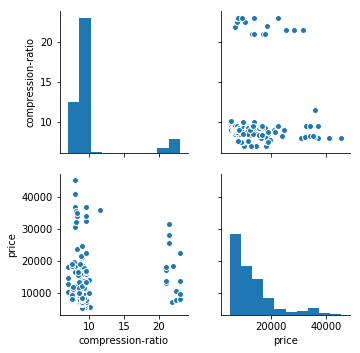

horsepower
r_pearson = 0.750964722695  ( p_value = 4.42730422624e-38 )
r_spearman = 0.843639531895  ( p_value = 3.41178395384e-56 )


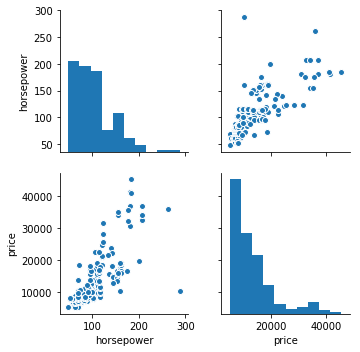

peak-rpm
r_pearson = -0.107047158702  ( p_value = 0.128475724455 )
r_spearman = -0.0773276218872  ( p_value = 0.272821374985 )


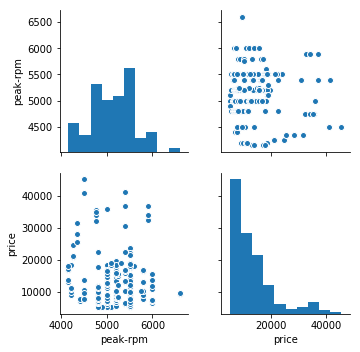

city-mpg
r_pearson = -0.672180781756  ( p_value = 4.797114608e-28 )
r_spearman = -0.817096072963  ( p_value = 5.71955957232e-50 )


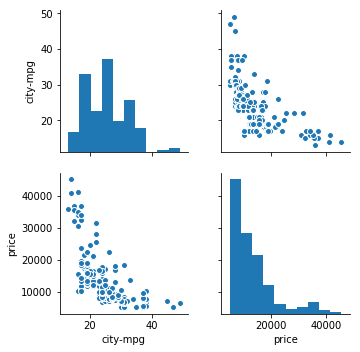

highway-mpg
r_pearson = -0.69626566919  ( p_value = 9.11069061535e-31 )
r_spearman = -0.818673828608  ( p_value = 2.60785292487e-50 )


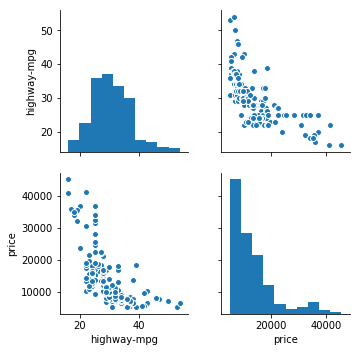

In [13]:
for feature in numerical[:-1]:
    print(feature)
    calc_correlations(feature)
    sns.pairplot(df[numerical].astype(float), vars=[feature, 'price'])
    plt.show()

Корреляции умеренные. В основном незначительные, но иногда достигают чуть менее 0.9. Нельзя сказать, что какой-то признак однозначно предсказывает целевую метку.

In [14]:
df_correlations = pd.DataFrame(columns=['pair', 'r_pearson', 'r_spearman'])
for idx, pair in enumerate(itertools.combinations(numerical, 2)):
    df_correlations.loc[idx, 'pair'] = pair
    df_correlations.loc[idx, 'r_spearman'] = abs(spearmanr(df[pair[0]].astype(float), df[pair[1]].astype(float))[0])
    df_correlations.loc[idx, 'r_pearson'] = abs(pearsonr(df[pair[0]].astype(float), df[pair[1]].astype(float))[0])
df_correlations = df_correlations.sort_values('r_pearson', ascending=False).reset_index(drop=True)

In [15]:
df_correlations.head(10)

,pair,r_pearson,r_spearman
0,"(city-mpg, highway-mpg)",0.970964,0.967397
1,"(length, curb-weight)",0.878719,0.891343
2,"(wheel-base, length)",0.874651,0.912016
3,"(width, curb-weight)",0.867307,0.864727
4,"(engine-size, price)",0.860134,0.811418
5,"(curb-weight, engine-size)",0.850236,0.877279
6,"(length, width)",0.8403,0.887021
7,"(curb-weight, price)",0.819436,0.894244
8,"(engine-size, horsepower)",0.812489,0.827155
9,"(curb-weight, highway-mpg)",0.802444,0.841107


Видно, что признаки city_mpg и highway-mpg сильно скоррелированы. Существенно сильнее, чем остальные. Чтобы избежать мультиколлинеарности, удалим из этих признаков. Например, highway-mpg.

In [16]:
del df['highway-mpg']

### One-Hot-Encoding для категориальных признаков

Чтобы неявным образом не вводить алгебру для значений категориального признака (говоря, например, что 'красный' = 1, а 'зеленый' = 2, из чего следует, что зеленый больше, чем красный, хотя на самом деле сравнивать их нельзя), воспользуемся алгоритмом One-Hot-Encoding, создав столько новых бинарных признаков, сколько значений категориального имеется.

In [17]:
for feature in cathegorical:
    one_hot = pd.get_dummies(df[feature], prefix='OHE_<'+feature+'>', prefix_sep='_')
    df = pd.concat([df, one_hot], axis=1)
    df = df.drop(feature, axis=1)

In [18]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,OHE_<num-of-cylinders>_twelve,OHE_<num-of-cylinders>_two,OHE_<fuel-system>_1bbl,OHE_<fuel-system>_2bbl,OHE_<fuel-system>_4bbl,OHE_<fuel-system>_idi,OHE_<fuel-system>_mfi,OHE_<fuel-system>_mpfi,OHE_<fuel-system>_spdi,OHE_<fuel-system>_spfi
0,3,115,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,115,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,115,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [19]:
df.tail()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,OHE_<num-of-cylinders>_twelve,OHE_<num-of-cylinders>_two,OHE_<fuel-system>_1bbl,OHE_<fuel-system>_2bbl,OHE_<fuel-system>_4bbl,OHE_<fuel-system>_idi,OHE_<fuel-system>_mfi,OHE_<fuel-system>_mpfi,OHE_<fuel-system>_spdi,OHE_<fuel-system>_spfi
198,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
199,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
200,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,0,0,0,1,0,0
201,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0
202,-1,95,109.1,188.8,68.9,55.5,3062,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0


Посмотрим на получившиеся признаки:

In [20]:
df.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'price',
       'OHE_<make>_alfa-romero', 'OHE_<make>_audi', 'OHE_<make>_bmw',
       'OHE_<make>_chevrolet', 'OHE_<make>_dodge', 'OHE_<make>_honda',
       'OHE_<make>_isuzu', 'OHE_<make>_jaguar', 'OHE_<make>_mazda',
       'OHE_<make>_mercedes-benz', 'OHE_<make>_mercury',
       'OHE_<make>_mitsubishi', 'OHE_<make>_nissan', 'OHE_<make>_peugot',
       'OHE_<make>_plymouth', 'OHE_<make>_porsche', 'OHE_<make>_renault',
       'OHE_<make>_saab', 'OHE_<make>_subaru', 'OHE_<make>_toyota',
       'OHE_<make>_volkswagen', 'OHE_<make>_volvo', 'OHE_<fuel-type>_diesel',
       'OHE_<fuel-type>_gas', 'OHE_<aspiration>_std', 'OHE_<aspiration>_turbo',
       'OHE_<num-of-doors>_four', 'OHE_<num-of-doors>_two',
       'OHE_<body-style>_convertible', 'OHE_<body-style>_hardtop',
       'OHE_<body-s

### Нормализация данных

Нормализуем данные, взяв за основу формулу для z_score:
\begin{equation}
z_i = \frac{x_i - \bar{x}}{s}
\end{equation}

Для это сначала приведем все поля к вещественному типу:

In [21]:
df = df.astype(float)

А затем выполним одновременно для всей таблицы (кроме целевой метки) операцию:

In [22]:
df_norm = (df.loc[:, df.columns != 'price'] - df.loc[:, df.columns != 'price'].mean()) / df.loc[:, df.columns != 'price'].std()

In [23]:
df_norm = pd.concat([df_norm, df['price']], axis=1)

In [24]:
df_norm.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,OHE_<num-of-cylinders>_two,OHE_<fuel-system>_1bbl,OHE_<fuel-system>_2bbl,OHE_<fuel-system>_4bbl,OHE_<fuel-system>_idi,OHE_<fuel-system>_mfi,OHE_<fuel-system>_mpfi,OHE_<fuel-system>_spdi,OHE_<fuel-system>_spfi,price
0,1.730021,-0.172175,-1.685365,-0.430607,-0.844205,-2.019028,-0.018976,0.070007,0.513955,-1.825284,...,-0.141427,-0.238767,-0.692372,-0.122172,-0.32055,-0.070186,1.084882,-0.214856,-0.070186,13495.0
1,1.730021,-0.172175,-1.685365,-0.430607,-0.844205,-2.019028,-0.018976,0.070007,0.513955,-1.825284,...,-0.141427,-0.238767,-0.692372,-0.122172,-0.32055,-0.070186,1.084882,-0.214856,-0.070186,16500.0
2,0.130047,-0.172175,-0.708705,-0.236103,-0.193125,-0.545144,0.507282,0.596359,-2.397491,0.683465,...,-0.141427,-0.238767,-0.692372,-0.122172,-0.32055,-0.070186,1.084882,-0.214856,-0.070186,16500.0
3,0.930034,1.363810,0.168634,0.201530,0.132415,0.232740,-0.422760,-0.432420,-0.517949,0.461171,...,-0.141427,-0.238767,-0.692372,-0.122172,-0.32055,-0.070186,1.084882,-0.214856,-0.070186,13950.0
4,0.930034,1.363810,0.102420,0.201530,0.225427,0.232740,0.509196,0.213558,-0.517949,0.461171,...,-0.141427,-0.238767,-0.692372,-0.122172,-0.32055,-0.070186,1.084882,-0.214856,-0.070186,17450.0


Перед тем как применять модели, получим в явном виде матрицу <объекты>-<признаки> и целевую метку:

In [25]:
X = df_norm.loc[:, df_norm.columns != 'price'].as_matrix()
y = df_norm.loc[:, 'price'].as_matrix()

### Применение нескольких регрессионных моделей

Напишем функции для learning_curve, validation_curve, а также функцию, рассчитыващую коэффициент детерминации и RMSE (выберем именно эти метрики из-за их популярности и адекватности). Будем применять их к рассматриваемым моделям.

Притом фолды будем создавать с помощью ShuffleSplit при фиксированном random_state.

In [26]:
cv=ShuffleSplit(n_splits=100, test_size=0.3, random_state=42)

In [27]:
def plot_learning_curve(title, estimator, train_sizes=np.linspace(0.1, 1.0, 30)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='r2')
    train_mean, train_std = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
    test_mean, test_std = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)
    
    plt.figure(figsize=(15,5))
    plt.title(title)
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
    plt.grid()
    plt.xlabel('Training examples')
    plt.ylabel('r2_score')
    plt.legend(loc='best')
    plt.show()

In [28]:
def plot_validation_curve(title, estimator, param_name, param_range):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name=param_name, param_range=param_range, \
                                                 cv=cv, scoring='r2')
    train_mean, train_std = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
    test_mean, test_std = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)
    
    plt.figure(figsize=(15,5))
    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel('r2_score')
    plt.semilogx(param_range, train_mean, 'o-', label='Training score', color='darkorange')
    plt.semilogx(param_range, test_mean, 'o-', label='Cross-validation score', color='navy')
    plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color='darkorange')
    plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.1, color='navy')
    plt.legend(loc="best")
    plt.show()

In [29]:
def calc_metrics(estimator, X=X, y=y, cv=cv):
    print('r2 = ', cross_val_score(estimator, X=X, y=y, cv=cv, scoring='r2').mean())
    print('RMSE = ', np.sqrt(abs(cross_val_score(estimator, X=X, y=y, cv=cv, scoring='neg_mean_squared_error').mean())))

### Ridge

Рассмотрим линейную регрессию с L2-регуляризацией. Диапазон адекватного коэффициента регуляризации попробуем подобрать с помощью валидационной кривой:

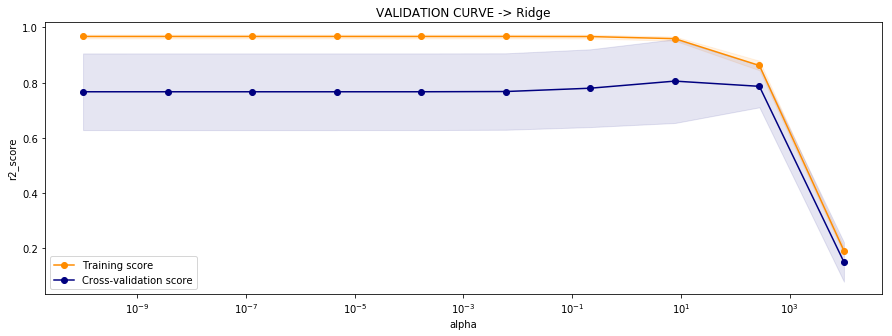

In [30]:
plot_validation_curve('VALIDATION CURVE -> Ridge', Ridge(), 'alpha',  np.logspace(-10, 4, 10))

 Видно, что пик соответствует примерно $\alpha \sim 10^1$.

Построим обучающую кривую с вычисленным параметром:

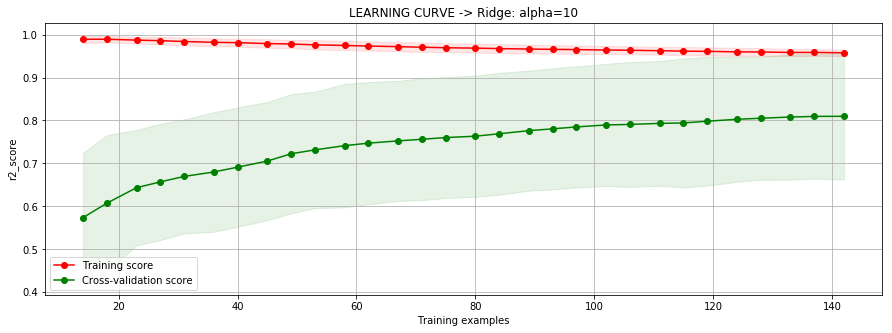

r2 =  0.809760341562
RMSE =  3187.35715026


In [31]:
estimator_Ridge = Ridge(alpha=10.)
plot_learning_curve('LEARNING CURVE -> Ridge: alpha=10', estimator_Ridge)
calc_metrics(estimator_Ridge)

Получили неплохой результат. Но это наверняка не предел.

### KernelRidge

Посмотрим, что будет, если добавить в регрессор ядро. Для поиска оптимального ядра и соответствующего ему коэффициента регуляризации воспользуемся GridSearchCV

In [32]:
alphas_KernelRidge = list(np.linspace(0, 0.09, 10)[1:]) + list(np.linspace(0, 1, 11)[1:]) + list(np.linspace(1, 10.,19)[1:])
parameters_KernelRidge = {'alpha' : alphas_KernelRidge, 
              'kernel' : ('rbf', 'laplacian', 'polynomial', 'sigmoid')} 
estimator_KernelRidge = KernelRidge()
gs_KernelRidge = GridSearchCV(estimator_KernelRidge, parameters_KernelRidge, scoring='r2', cv=cv, n_jobs=2)
gs_KernelRidge.fit(X,y)

GridSearchCV(cv=ShuffleSplit(n_splits=100, random_state=42, test_size=0.3, train_size=None),
       error_score='raise',
       estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'alpha': [0.01, 0.02, 0.029999999999999999, 0.040000000000000001, 0.050000000000000003, 0.059999999999999998, 0.070000000000000007, 0.080000000000000002, 0.089999999999999997, 0.10000000000000001, 0.20000000000000001, 0.30000000000000004, 0.40000000000000002, 0.5, 0.60000000000000009, 0...., 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0], 'kernel': ('rbf', 'laplacian', 'polynomial', 'sigmoid')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

In [33]:
gs_KernelRidge.best_params_

{'alpha': 1.5, 'kernel': 'polynomial'}

Получив оптимальные параметры, построим кривую обучения и кроссвалидации на них, аналогично предыдущему случаю:

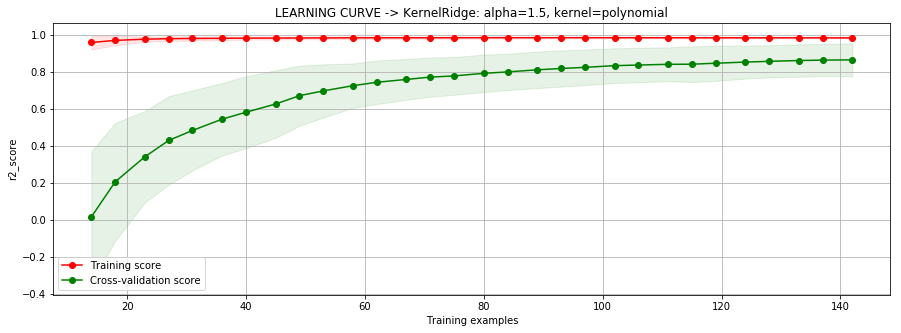

r2 =  0.864014744844
RMSE =  2744.6723551


In [34]:
estimator_KernelRidge = KernelRidge(alpha=1.5, kernel='polynomial')
plot_learning_curve('LEARNING CURVE -> KernelRidge: alpha=1.5, kernel=polynomial', estimator_KernelRidge)
calc_metrics(estimator_KernelRidge)

Результат получился лучше! Использование ядра ведет к улушению качества предсказаний.

### ElasticNet

Комбинация L1- и L2-регуляризации, возможно, улучшит модель. Применим ElasticNet!

Применим GridSearchCV для поиска оптимальных alpha и l1_ratio:

In [35]:
parameters_ElasticNet = {'alpha' : np.linspace(0.15, 1.10, 7), 'l1_ratio' : np.linspace(0.1, 0.9, 9) } 
estimator_ElasticNet = ElasticNet()
gs_ElasticNet = GridSearchCV(estimator_ElasticNet, parameters_ElasticNet, scoring='r2', cv=cv, n_jobs=2)
gs_ElasticNet.fit(X,y)

GridSearchCV(cv=ShuffleSplit(n_splits=100, random_state=42, test_size=0.3, train_size=None),
       error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'alpha': array([ 0.15   ,  0.30833,  0.46667,  0.625  ,  0.78333,  0.94167,  1.1    ]), 'l1_ratio': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

In [36]:
gs_ElasticNet.best_params_

{'alpha': 0.94166666666666676, 'l1_ratio': 0.59999999999999998}

Применим полученные параметры:

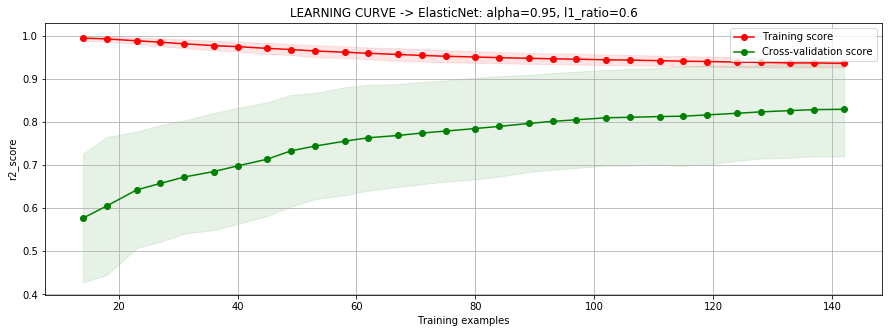

r2 =  0.829628397083
RMSE =  3061.18903123


In [37]:
estimator_ElasticNet = ElasticNet(alpha=0.95, l1_ratio=0.6)
plot_learning_curve('LEARNING CURVE -> ElasticNet: alpha=0.95, l1_ratio=0.6', estimator_ElasticNet)
calc_metrics(estimator_ElasticNet)

Результат получился хороший, но не лучший.

### Lasso

А что будет, если применить только L1-регуляризацию? Для поиска оптимального параметра alpha воспользуемся вновь GridSearchCV. Строить валидационную кривую не будем, потому что по ней сложно определить оптимальный параметр с необходимой точностью. Заметим, что характерные alpha будут существенно больше, чем в случае L2-регуляризации, поскольку штраф за переобучение должен быть больше ввиду меньшей степени нормы весов.

Поставим заранее достаточно больше количество итераций max_iter для гарантированности сходимости алгоритма.

In [38]:
parameters_Lasso = {'alpha' : np.linspace(100, 500, 401) } 
estimator_Lasso = Lasso(max_iter=5000)
gs_Lasso = GridSearchCV(estimator_Lasso, parameters_Lasso, scoring='r2', cv=cv, n_jobs=2)
gs_Lasso.fit(X,y)

GridSearchCV(cv=ShuffleSplit(n_splits=100, random_state=42, test_size=0.3, train_size=None),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'alpha': array([ 100.,  101., ...,  499.,  500.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

In [39]:
gs_Lasso.best_params_

{'alpha': 212.0}

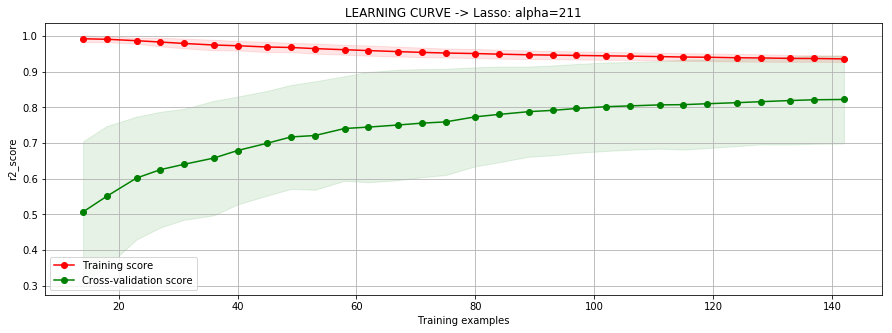

r2 =  0.822171915814
RMSE =  3121.68376998


In [40]:
estimator_Lasso = Lasso(alpha=211., max_iter=5000)
plot_learning_curve('LEARNING CURVE -> Lasso: alpha=211', estimator_Lasso)
calc_metrics(estimator_Lasso)

Достойный результат! Даже немножко выше, чем у Rigde.

### RandomForest

В задачах классификации очень хороши ансамбли решающих деревьев, а именно Random Forest. Попробуем применить его здесь для задачи регрессии. Алгоритм будет работать тем качественнее, чем больше будет переобучено каждое дерево и чем больше будет 
этих деревьев всего. В настройках по умолчанию уже стоят оптимальные параметры с т.з. глубины деревьев, остается просто увеличить их количество. Поскольку алгоритм тяжелый и работает долго (даже с распараллеливанием), возьмем не слишком большое число деревьев - 20.

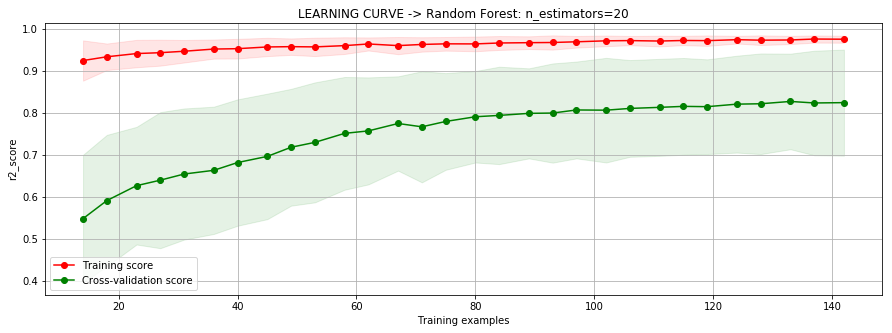

r2 =  0.826612051572
RMSE =  3081.90755013


In [41]:
estimator_RandomForest = RandomForestRegressor(n_estimators=20, n_jobs=-1)
plot_learning_curve('LEARNING CURVE -> Random Forest: n_estimators=20', estimator_RandomForest)
calc_metrics(estimator_RandomForest)

Среднее, но приемлемое качество предсказания.

### GradientBoosting

Зачастую еще лучшие результаты, чем Random Forest, дает градиентный бустинг. Испробуем и его.

Деревья в бустинге легче, поэтому увеличим их количество и запустим.

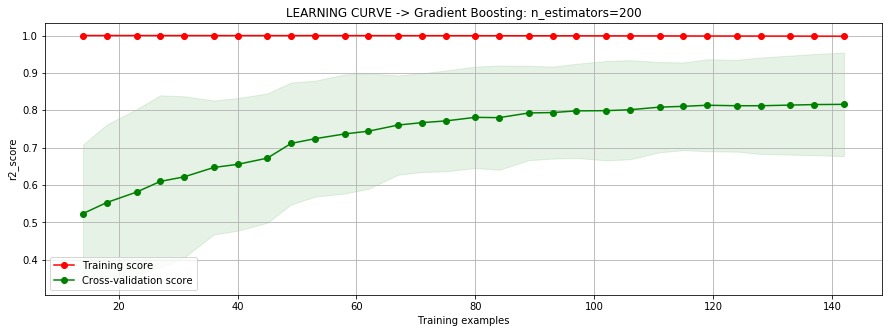

r2 =  0.818223701444
RMSE =  3162.42771185


In [42]:
estimator_GradientBoosting = GradientBoostingRegressor(n_estimators=200)
plot_learning_curve('LEARNING CURVE -> Gradient Boosting: n_estimators=200', estimator_GradientBoosting)
calc_metrics(estimator_GradientBoosting)

Примерно на том же уровне, что и RandomForest.

Упомянутые здесь алгоритмы регрессии далеко не единственные. Их существует гораздо больше. Многие здесь не были представлены из-за того, что они давали практически такие же результаты, что и некоторые представленные. 

### Визуализация результатов

Визуализируем метрику r2_score для представленныех алгоритмов:

In [43]:
r2_estimators = {}
for estimator in tqdm_notebook([('Ridge', Ridge(alpha=10.)), \
                  ('KernelRidge', KernelRidge(alpha=1.5, kernel='polynomial')), \
                  ('ElasticNet', ElasticNet(alpha=0.95, l1_ratio=0.6)), \
                  ('Lasso', Lasso(alpha=211., max_iter=5000)), \
                  ('RandomForest', RandomForestRegressor(n_estimators=20, n_jobs=-1)), \
                  ('GradientBoosting', GradientBoostingRegressor(n_estimators=200))]):
    
    r2 = cross_val_score(estimator[1], X, y, cv=cv, scoring='r2').mean()
    r2_estimators.update({estimator[0]:r2})

A Jupyter Widget

In [44]:
r2_estimators

{'ElasticNet': 0.82962839708324765,
 'GradientBoosting': 0.81545323061513897,
 'KernelRidge': 0.86401474484369489,
 'Lasso': 0.8221719158136952,
 'RandomForest': 0.82735155573124797,
 'Ridge': 0.80976034156152965}

In [45]:
df_r2 = pd.DataFrame(list(r2_estimators.items()), columns=['Model', 'r2_score'])
df_r2 = df_r2.sort_values('r2_score', ascending=False).reset_index(drop=True)

In [46]:
df_r2.head()

,Model,r2_score
0,KernelRidge,0.864015
1,ElasticNet,0.829628
2,RandomForest,0.827352
3,Lasso,0.822172
4,GradientBoosting,0.815453


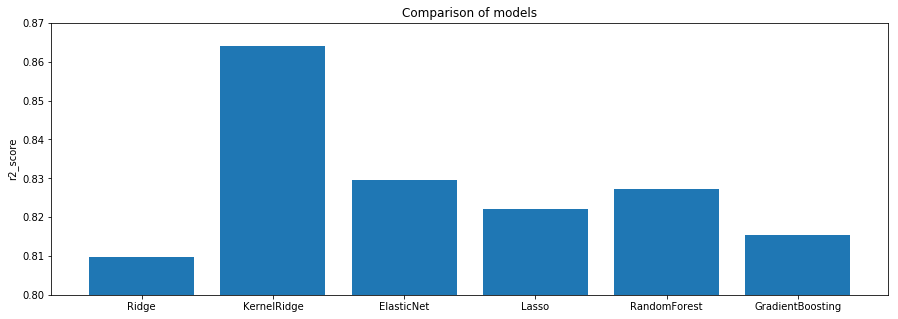

In [47]:
plt.figure(figsize=(15,5))
plt.title('Comparison of models')
plt.bar(range(len(r2_estimators)), r2_estimators.values(), align='center')
plt.xticks(range(len(r2_estimators)), r2_estimators.keys())
plt.ylim([0.8, 0.87])
plt.ylabel('r2_score')
plt.show()

# Пути улучшения прогноза

Произведенный feature_ingineering для рассмотренных моделей наверняка может быть модернизирован при более тщательном рассмотрении. Включение в сетку поиска оптимальных параметров дополнительных размерностей повысит вероятность улучшить итоговый score. Не рассмотренные здесь модели, такие как SGDRegressor, специальные нейронные сети, стекинг моделей и работа с метапризнаками весьма вероятно, что повысят качество прогноза. Кроме того, увеличение количества данных будет способствовать более глубокому обучению моделей, что отразится на кривых обучения.